Image Rescaling:

In [28]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model
from sklearn.metrics import precision_score,accuracy_score,recall_score,f1_score,confusion_matrix,mean_squared_error

In [29]:
(x_train, y_train), (_, _) = tf.keras.datasets.mnist.load_data()

In [30]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [31]:
# expand new axis, channel axis 
x_train = np.expand_dims(x_train, axis=-1)

# [optional]: we may need 3 channel (instead of 1)
x_train = np.repeat(x_train, 3, axis=-1)

x_train = x_train.astype('float32') / 255

# resize the input shape , i.e. old shape: 28, new shape: 32
x_train = tf.image.resize(x_train, [32,32]) # if we want to resize 


In [32]:
# one hot 
y_train = tf.keras.utils.to_categorical(y_train , num_classes=10)
x_test=x_train[:5000]
y_test=y_train[:5000]
x_train=x_train[5000:]
y_train=y_train[5000:]
print(x_train.shape, y_train.shape)
print(x_test.shape,y_test.shape)

(55000, 32, 32, 3) (55000, 10)
(5000, 32, 32, 3) (5000, 10)


In [41]:
def resnet_model():
  input = tf.keras.Input(shape=(32,32,3))
  efnet = tf.keras.applications.ResNet50(weights='imagenet',
                                              include_top = False, 
                                              input_tensor = input)
  # Now that we apply global max pooling.
  gap = tf.keras.layers.GlobalMaxPooling2D()(efnet.output)

  # Finally, we add a classification layer.
  output = tf.keras.layers.Dense(10, activation='softmax', use_bias=True)(gap)

  # bind all
  func_model = tf.keras.Model(efnet.input, output)
  func_model.compile(loss  = tf.keras.losses.CategoricalCrossentropy(),metrics = tf.keras.metrics.CategoricalAccuracy(),optimizer = tf.keras.optimizers.Adam())
  return func_model

def draw(history):
  fig, axs = plt.subplots(2, 1, figsize=(15,15))
  axs[0].plot(history.history['loss'])
  # axs[0].plot(history.history['val_loss'])
  axs[0].title.set_text('Training Loss')
  axs[0].set_xlabel('Epochs')
  axs[0].set_ylabel('Loss')
  axs[0].legend(['Train', 'Val'])

  # axs[1].plot(history.history['accuracy'])
  axs[1].plot(history.history['categorical_accuracy'])
  axs[1].title.set_text('Training Accuracy')
  axs[1].set_xlabel('Epochs')
  axs[1].set_ylabel('Accuracy')
  axs[1].legend(['Train', 'Val'])

def result(model,history):
  score=model.evaluate(x_test,y_test)
  print("Accuracy:",score[1])
  print("Loss:",score[0])
  y_pred=model.predict(x_test).argmax(1)
  y_pred_n=np.asarray(y_pred).reshape(-1,1)
  y_test_n=np.asarray(y_test).argmax(1).reshape(-1,1)
#   print(y_train.shape,y_pred.shape)
  cm=confusion_matrix(y_test_n,y_pred_n)
  print(cm)
  print("f1-Score:",f1_score(y_test_n,y_pred_n, average=None).reshape(-1,1))
  plot_confusion_matrix(cm,list(range(10)))


import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model
import itertools
def plot_confusion_matrix( cm, classes, normalize = False, title='Confusion matrix', cmap=plt.cm.Blues):
        f3 = plt.figure(3)
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)
        
        fmt = '.2f' if normalize else 'd' 
        thresh = cm.max()/2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment = "center",
                     color = "white" if cm[i, j] > thresh else "black")
            plt.tight_layout()
            plt.ylabel('True label')
            plt.xlabel('predicted label')
            f3.show()

In [34]:
model=resnet_model()
history=model.fit(x_train, y_train, batch_size=128, epochs=20, verbose = 2)

Epoch 1/20
430/430 - 24s - loss: 0.1700 - categorical_accuracy: 0.9611
Epoch 2/20
430/430 - 19s - loss: 0.0459 - categorical_accuracy: 0.9873
Epoch 3/20
430/430 - 19s - loss: 0.0334 - categorical_accuracy: 0.9905
Epoch 4/20
430/430 - 19s - loss: 0.0293 - categorical_accuracy: 0.9917
Epoch 5/20
430/430 - 19s - loss: 0.0269 - categorical_accuracy: 0.9927
Epoch 6/20
430/430 - 19s - loss: 0.0264 - categorical_accuracy: 0.9920
Epoch 7/20
430/430 - 19s - loss: 0.0213 - categorical_accuracy: 0.9941
Epoch 8/20
430/430 - 19s - loss: 0.0207 - categorical_accuracy: 0.9942
Epoch 9/20
430/430 - 19s - loss: 0.0196 - categorical_accuracy: 0.9947
Epoch 10/20
430/430 - 19s - loss: 0.0189 - categorical_accuracy: 0.9947
Epoch 11/20
430/430 - 19s - loss: 0.0312 - categorical_accuracy: 0.9925
Epoch 12/20
430/430 - 19s - loss: 0.0577 - categorical_accuracy: 0.9853
Epoch 13/20
430/430 - 19s - loss: 0.0225 - categorical_accuracy: 0.9933
Epoch 14/20
430/430 - 19s - loss: 0.0141 - categorical_accuracy: 0.9958
E

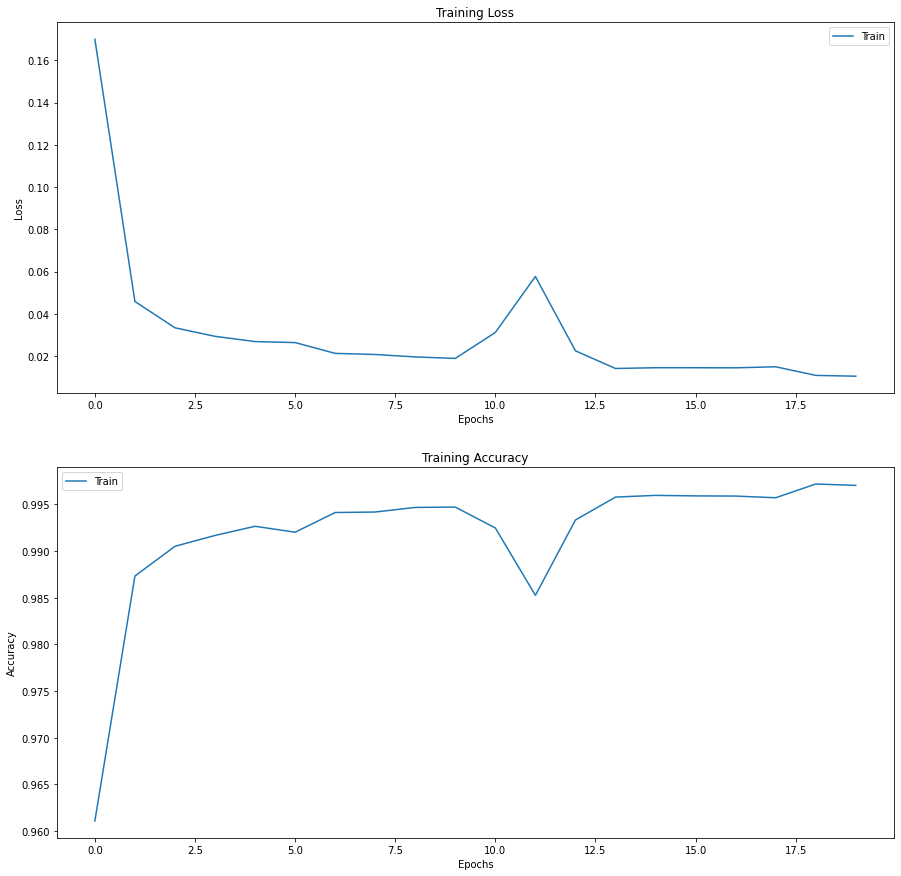

In [37]:
draw(history)

157/157 [==============================] - 2s 14ms/step - loss: 0.0407 - categorical_accuracy: 0.9904
Accuracy: 0.9904000163078308
Loss: 0.04069537669420242
[[477   0   0   0   0   0   2   0   0   0]
 [  0 559   0   0   0   0   0   4   0   0]
 [  0   1 483   0   0   0   0   1   3   0]
 [  0   1   1 484   0   4   0   2   0   1]
 [  0   0   0   0 528   0   0   0   0   7]
 [  0   0   0   1   0 429   2   0   1   1]
 [  1   0   0   0   1   0 499   0   0   0]
 [  0   3   1   0   1   0   0 544   0   1]
 [  1   0   0   0   0   0   1   0 460   0]
 [  1   0   0   0   1   0   0   2   2 489]]
f1-Score: [[0.99478624]
 [0.9920142 ]
 [0.99280576]
 [0.98977505]
 [0.99061914]
 [0.98961938]
 [0.99303483]
 [0.98640073]
 [0.99137931]
 [0.98390342]]


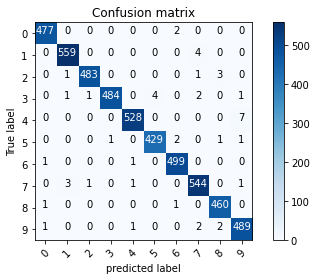

In [42]:
result(model,history)

Standardisation:



In [43]:
(x_train, y_train), (_, _) = tf.keras.datasets.mnist.load_data()

In [44]:
#Find the Mean And Standard Deviation
ds_mean = tf.zeros([28,28, 1], tf.float32)
for image in x_train:
    ds_mean += tf.cast(image, tf.float32)
ds_mean /= len(x_train)

ds_stddev = tf.zeros([28, 28, 1], tf.float32)
for image in x_train:
    ds_stddev += tf.square(tf.cast(image, tf.float32) - ds_mean)
ds_stddev /= len(x_train)
ds_stddev = tf.sqrt(ds_stddev)

In [45]:
#Applying Standardisation Formula:
for image in x_train:
    image=(image-ds_mean)/ds_stddev

In [46]:
# expand new axis, channel axis 
x_train = np.expand_dims(x_train, axis=-1)

x_train = np.repeat(x_train, 3, axis=-1)

# it's always better to normalize 
x_train = x_train.astype('float32') / 255

# resize the input shape , i.e. old shape: 28, new shape: 32
x_train = tf.image.resize(x_train, [32,32]) # if we want to resize 



In [47]:
# one hot 
y_train = tf.keras.utils.to_categorical(y_train , num_classes=10)
x_test=x_train[:5000]
y_test=y_train[:5000]
x_train=x_train[5000:]
y_train=y_train[5000:]
print(x_train.shape, y_train.shape)
print(x_test.shape,y_test.shape)

(55000, 32, 32, 3) (55000, 10)
(5000, 32, 32, 3) (5000, 10)


In [48]:
model=resnet_model()
history=model.fit(x_train, y_train, batch_size=128, epochs=20, verbose = 2)

Epoch 1/20
430/430 - 24s - loss: 0.1350 - categorical_accuracy: 0.9647
Epoch 2/20
430/430 - 19s - loss: 0.0443 - categorical_accuracy: 0.9881
Epoch 3/20
430/430 - 19s - loss: 0.0338 - categorical_accuracy: 0.9904
Epoch 4/20
430/430 - 19s - loss: 0.0303 - categorical_accuracy: 0.9919
Epoch 5/20
430/430 - 19s - loss: 0.0389 - categorical_accuracy: 0.9898
Epoch 6/20
430/430 - 19s - loss: 0.0269 - categorical_accuracy: 0.9926
Epoch 7/20
430/430 - 19s - loss: 0.0222 - categorical_accuracy: 0.9937
Epoch 8/20
430/430 - 19s - loss: 0.0221 - categorical_accuracy: 0.9938
Epoch 9/20
430/430 - 19s - loss: 0.0878 - categorical_accuracy: 0.9806
Epoch 10/20
430/430 - 19s - loss: 0.0270 - categorical_accuracy: 0.9924
Epoch 11/20
430/430 - 19s - loss: 0.0201 - categorical_accuracy: 0.9939
Epoch 12/20
430/430 - 19s - loss: 0.0170 - categorical_accuracy: 0.9952
Epoch 13/20
430/430 - 19s - loss: 0.0179 - categorical_accuracy: 0.9951
Epoch 14/20
430/430 - 19s - loss: 0.0135 - categorical_accuracy: 0.9961
E

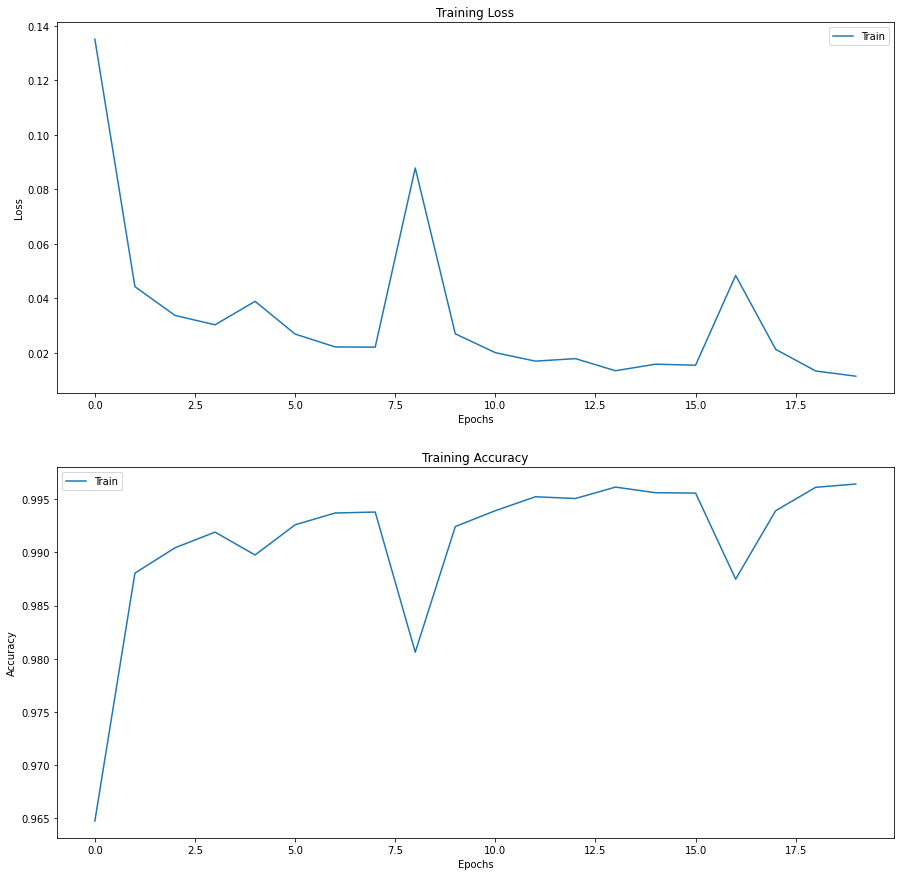

In [49]:
draw(history)

157/157 [==============================] - 3s 14ms/step - loss: 0.0253 - categorical_accuracy: 0.9930
Accuracy: 0.9929999709129333
Loss: 0.02532161772251129
[[478   0   0   0   0   0   1   0   0   0]
 [  0 560   0   0   0   0   0   3   0   0]
 [  1   1 484   0   0   0   0   1   1   0]
 [  0   0   0 491   0   1   0   1   0   0]
 [  0   0   0   0 533   0   0   1   0   1]
 [  0   1   0   3   0 429   1   0   0   0]
 [  1   1   0   0   0   0 499   0   0   0]
 [  0   3   2   0   2   0   0 542   0   1]
 [  0   1   0   0   0   2   1   0 458   0]
 [  1   1   0   1   1   0   0   0   0 491]]
f1-Score: [[0.99583333]
 [0.99027409]
 [0.99383984]
 [0.99392713]
 [0.99533147]
 [0.99076212]
 [0.99501496]
 [0.98724954]
 [0.99457112]
 [0.99392713]]


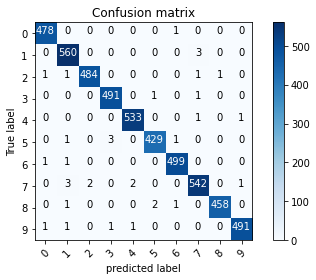

In [50]:
result(model,history)

Without Normalisation

In [51]:
(x_train, y_train), (_, _) = tf.keras.datasets.mnist.load_data()

In [52]:
# expand new axis, channel axis 
x_train = np.expand_dims(x_train, axis=-1)

x_train = np.repeat(x_train, 3, axis=-1)

x_train = x_train.astype('float32')

# resize the input shape , i.e. old shape: 28, new shape: 32
x_train = tf.image.resize(x_train, [32,32]) # if we want to resize 


In [53]:
# one hot 
y_train = tf.keras.utils.to_categorical(y_train , num_classes=10)
x_test=x_train[:5000]
y_test=y_train[:5000]
x_train=x_train[5000:]
y_train=y_train[5000:]
print(x_train.shape, y_train.shape)
print(x_test.shape,y_test.shape)

(55000, 32, 32, 3) (55000, 10)
(5000, 32, 32, 3) (5000, 10)


In [54]:
model=resnet_model()
history=model.fit(x_train, y_train, batch_size=128, epochs=20, verbose = 2)

Epoch 1/20
430/430 - 24s - loss: 0.1291 - categorical_accuracy: 0.9651
Epoch 2/20
430/430 - 20s - loss: 0.0448 - categorical_accuracy: 0.9877
Epoch 3/20
430/430 - 19s - loss: 0.0394 - categorical_accuracy: 0.9898
Epoch 4/20
430/430 - 20s - loss: 0.1135 - categorical_accuracy: 0.9739
Epoch 5/20
430/430 - 19s - loss: 0.0370 - categorical_accuracy: 0.9896
Epoch 6/20
430/430 - 20s - loss: 0.0253 - categorical_accuracy: 0.9925
Epoch 7/20
430/430 - 19s - loss: 0.0230 - categorical_accuracy: 0.9935
Epoch 8/20
430/430 - 19s - loss: 0.0210 - categorical_accuracy: 0.9940
Epoch 9/20
430/430 - 19s - loss: 0.0215 - categorical_accuracy: 0.9940
Epoch 10/20
430/430 - 19s - loss: 0.0175 - categorical_accuracy: 0.9950
Epoch 11/20
430/430 - 19s - loss: 0.0197 - categorical_accuracy: 0.9943
Epoch 12/20
430/430 - 20s - loss: 0.0178 - categorical_accuracy: 0.9949
Epoch 13/20
430/430 - 19s - loss: 0.0172 - categorical_accuracy: 0.9950
Epoch 14/20
430/430 - 20s - loss: 0.0161 - categorical_accuracy: 0.9953
E

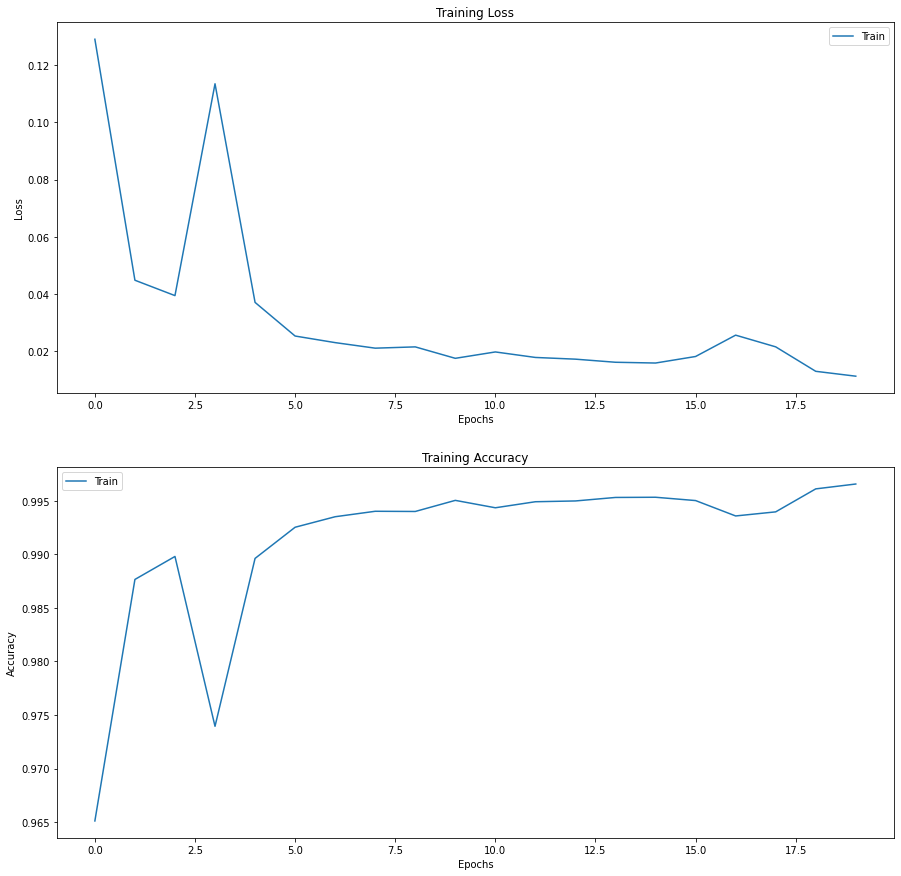

In [55]:
draw(history)

157/157 [==============================] - 3s 14ms/step - loss: 0.0353 - categorical_accuracy: 0.9908
Accuracy: 0.9908000230789185
Loss: 0.035269442945718765
[[477   0   1   0   0   0   0   0   0   1]
 [  0 557   3   1   0   0   0   2   0   0]
 [  0   1 485   0   0   0   0   0   2   0]
 [  0   0   1 490   0   0   0   0   2   0]
 [  0   0   0   0 534   0   0   0   0   1]
 [  0   0   1   5   1 422   0   0   4   1]
 [  1   0   0   0   0   1 497   0   2   0]
 [  0   1   3   1   2   0   0 539   0   4]
 [  0   0   0   0   0   0   1   0 461   0]
 [  0   0   0   0   1   1   0   0   1 492]]
f1-Score: [[0.9968652 ]
 [0.99286988]
 [0.98778004]
 [0.98989899]
 [0.99534017]
 [0.98368298]
 [0.99499499]
 [0.98808433]
 [0.98715203]
 [0.98993964]]


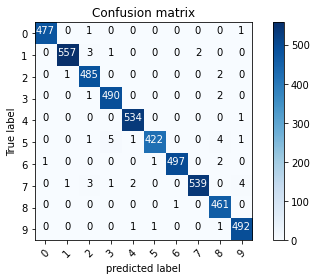

In [56]:
result(model,history)